# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv("../input/50-startups/50_Startups.csv", sep=",")
df = startups.copy()

İlk 5 gözlemini yazdıralım.

In [3]:
df.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

→ 50 gözlem ve 5 değişkenden oluşuyor.

Eksik verileri kontrol edelim.

In [6]:
df.isna().sum() # görmüş olduğumuz gibi eksik verimiz yok

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


→ Korelasyon 1.0'e yaklaştıkça değerler arasındaki ilişki o kadar güçlenir. Burada **Profit** ile **R&D Spend** arasında 1'e yakın bir değer (0.972900) gözlenmiş bu demek oluyor ki ikisi arasında pozitif nerdeyse mükemmel bir ilişki vardır. **Marketing Spend** ile de **Administration** arasında da negatif bir ilişki olduğunu söyleyebiliriz.

Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

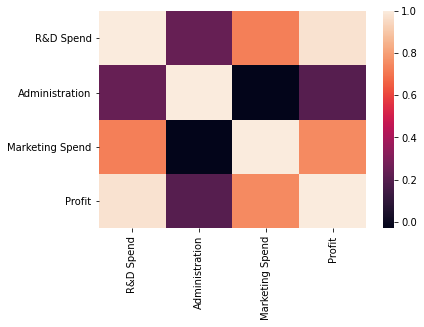

In [8]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

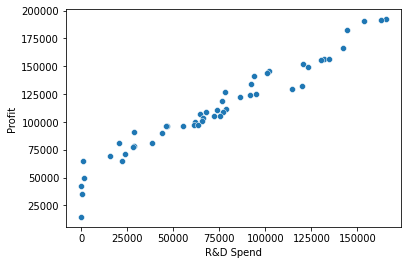

In [9]:
sns.scatterplot(x = "R&D Spend", y = "Profit", data = df); 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

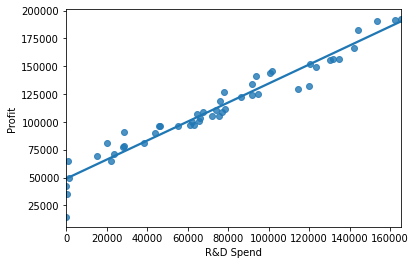

In [10]:
sns.regplot(df["R&D Spend"],df["Profit"] , ci=None)

* profit sadece bir değişkene bağlı değil birden fazla feature olduğundan → multiple 
* multiple: bir y eksenine birden fazla şeyin etki etmesi demektir
* y = b0+ b1.x1+ b2.x2 doğru denklemi
* profit= b0+ b1.r&d +b2.administration+....
* b0: constant/sabit/bias ~ y eksenini kestiği nokta
* b1: coeff/katsayı ~eğim
* amaç: min(MSE)
* profit: bağımlı değişken~dependent variable
* administration,r&d,Marketing Spend: bağımsız değişken~independent variable



Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

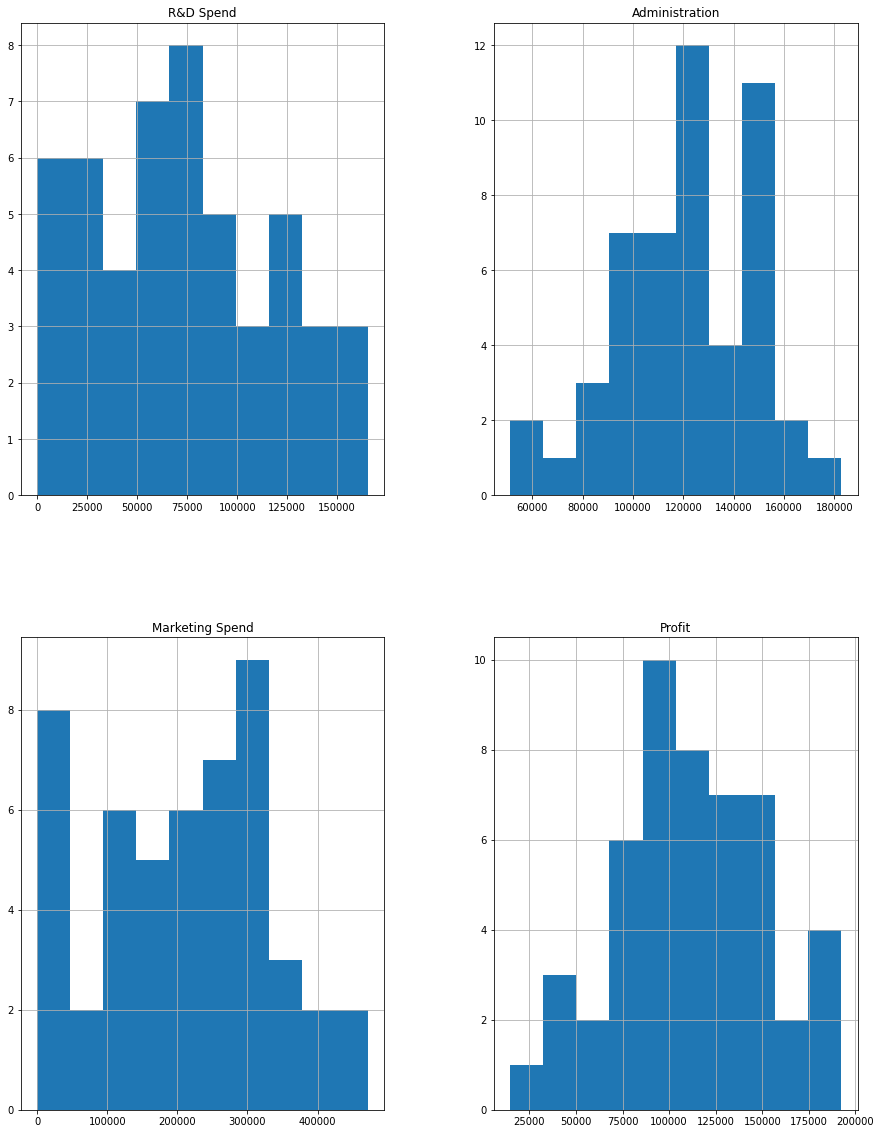

In [11]:
df.hist(figsize =(15,20))

→Histogram şemaları verilerin devam eden ya da belirli zaman aralığındaki dağılımını göstermek için kullanılır. Değerlerin nerede yoğunlaştığını, maksimum ve minimum noktalarını, veriler arasındaki kopmalar ve olağandışı değerler olup olmadığı hakkında tahminde bulunulmasına yardımcı olur.

* R&D Spend histogramını bakarsak; verilerin 0'dan 150 bin daha fazla tahmini olarak 170 bin gibi değerlere sahip olduğunu görebiliriz aynı zamanda verimizin 50bin ile 80 bin arasında daha yoğun olduğunu görüyoruz. Burada en küçük değer olarak sıfırı görüyoruz. Yani bazı startuplar araştırma geliştirmeye(Research and Development) bütçe ayırmadığı ya da çok küçük bir bütçe ayırdığını görebiliyoruz.

* Marketing Spend histogramını bakarsak; verilerin 0 ve tahmini olarak 320 bin arasında daha yoğun olduğunu söyleyebiliriz. Yani bazı startuplar pazarlamaya hiç bütçe ayırmazken bazı startuplar ise çok büyük bütçeler ayırabiliyor.

* Administration histogramını bakarsak; verilerin 90 bin ile 150 bin arasında daha yoğun olduğunu görebiliyoruz. Genel bir gözle bakarsak 100 bin  ile 200 bin aralığında bütçeden yapılan harcamalarsa en fazla harcama yönetime yapılmış.Yönetim bu parayı şirket karı için kullanmış olabilirler bu da profit'e yansır ya da sadece kendi giderleri için kullanmış olabilirler. Bu yüzden yönetim harcamaları ile karın korelasyonuna bakmak istiyorum.

In [12]:
df.corr()["Administration"]["Profit"]

0.20071656826872125

* Administrationı ve Profit arasındaki korelasyona baktığımda "0.20071656826872125" değerini gördük. Yönetim bu parayı şirket karı için kullanmamış diyebiliriz. Belki bu harcamanın içinde maaşlar yer alıyor olabilir.

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


* Standart sapma çok yüksek neredeyse özniteliklerimin ortalama değerlerinin yarısı kadar.




Eğer bir veri ortalamaya yakın ise standart sapma düşük olur ama eğer ortalamaya uzakta bir dağılım söz konusuysa standart sapma değeri  büyük olur. Varyans standart sapmanın karesi olduğundan ortalamaları ve standart sapma değerleri ile varyans yorumu yapabiliriz.
* Standart sapması en yüksek olan değer "Marketing Spend" dir. Bu yüzden en yüksek varyansa sahiptir.
* Standart sapması en düşük değer ise "Administration" dir. Bu yüzden en küçük varyans değerine sahiptir.

State'a ait benzersiz değerleri görüntüleyelim.

In [14]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [15]:
df['State'] = pd.Categorical(df['State'])
dfDummies = pd.get_dummies(df['State'], prefix = 'StateOf') 
#pd.get_dummies(),veri işleme için kullanılır. Kategorik verileri kukla veya gösterge değişkenlere dönüştürür.
#prefix = 'StateOf' , sütun adlarına ön ek eklemek için kullanılır
dfDummies.head()#50 değeri göstermeyip sadece ilk beş gözlemi getiriyorum

,StateOf_California,StateOf_Florida,StateOf_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [16]:
df = pd.concat([df, dfDummies], axis = 1)
df.head()
#concat fonksiyonunu kullanırken sütunların isimlerini ayrıca belirtmemize gerek olmadan serileri birleştirebiliriz.

,R&D Spend,Administration,Marketing Spend,State,Profit,StateOf_California,StateOf_Florida,StateOf_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [17]:
df.drop(["State", "StateOf_New York"], axis = 1, inplace = True)

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,StateOf_California,StateOf_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


* Modelde yer alan nitel vasıflı değişkenlere kukla değişken denir. Kukla değişkenler genel olarak ikil/binom (kadın,erkek) ve çoklu (mezuniyet: ilköğretim, ortaöğretim, lise, lisans, lisansüstü vb) biçimde iki yaklaşımla ölçülür.Binom ölçeklendirmede nitel değişken 1 ve 0 durumunu alır(kadın=1, erkek=0 gibi). Çoklu (polychotomous) ölçeklendirmede ise değişkene ait niteliksel vasıflar uygun ve aralarında anlamsal bir farklılığı yansıtacak bir biçimde sıralanır( ilköğretim =0, ortaöğretim=1, lise=2, lisans=3, lisansüstü=4 gibi).

* Modelde eğer nitel bir değişkenin ikili yapıda tanımlarını kullanacak isek, model sağlıklı bir biçimde tahmin edilemez çünkü katsayılardan oluşan matrisinin tersi alınamaz. **Modelin sağlıklı bir biçimde tahmin edilebilmesi için genelde kontrol değişkeni olarak tanımlanan kukla değişkenini modelden düşürmemiz gerekir. Yani sizin araştırmadaki amacınız kadın olma vasfının bağımlı değişken üzerindeki etkisi is tabloda verilen "cinsiyet" ve "erkek" sütunlarını kullanmamamız gerekir.

→ State özniteliğini ve statelerden birini seçip siliyorum.


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [19]:
X = df.drop("Profit", axis = 1)
y = df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [20]:
X.head(10) #bagimsiz değişkenleri görüyorum

,R&D Spend,Administration,Marketing Spend,StateOf_California,StateOf_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [21]:
y.head(10) #bağımlı değişken olan profiti görüntülüyorum

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

→ Profit özniteliği 0 dan 10. gözleme gidildikçe azalmaktadır. Bu bağımsız değişkenlerden kaynaklanıyor.
* Lineer regresyon yaptığımızda gözlem sırası karışacak, karışık şekilde öğrenmesini sağlayacağız yani önce karı artıran sonra azaltan değerleri bir arada öğrenmeyecek.

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Test size'ı %20 , Train(öğrenme) ise %80 olarak kullanıyorum burada öğrenme veri kümesini küçük tutarak sonuçların çok iyi olmasını engelliyorum.
#Veri setimizdeki test size 10 veriye, train ise 40 veriye tekabül ediyor.
#Random state belirtmek bu noktada önemli belirtilmezse, kodu her çalıştırdığımızda yeni bir rastgele değer oluşturulur.
#train ve test veri kümelerinin her seferinde farklı değerleri olur. Python bu data'yı her seferinde farklı yerlerinden böler.
#Eğer bir random_state değeri belirlersek her seferinde o değere göre böler. Yani aynı test verileriyle test etmiş oluruz.
#Random state kullanarak rassallığı engelleriz.

4 parça değişkeni kontrol edelim.

In [23]:
X_train.head(10)

,R&D Spend,Administration,Marketing Spend,StateOf_California,StateOf_Florida
33,55493.95,103057.49,214634.81,0,1
35,46014.02,85047.44,205517.64,0,0
26,75328.87,144135.98,134050.07,0,1
34,46426.07,157693.92,210797.67,1,0
18,91749.16,114175.79,294919.57,0,1
7,130298.13,145530.06,323876.68,0,1
14,119943.24,156547.42,256512.92,0,1
45,1000.23,124153.04,1903.93,0,0
48,542.05,51743.15,0.00,0,0
29,65605.48,153032.06,107138.38,0,0


In [24]:
X_test #test olduğundan 10 veri geldi (%20 )

,R&D Spend,Administration,Marketing Spend,StateOf_California,StateOf_Florida
28,66051.52,182645.56,118148.20,0,1
11,100671.96,91790.61,249744.55,1,0
10,101913.08,110594.11,229160.95,0,1
41,27892.92,84710.77,164470.71,0,1
2,153441.51,101145.55,407934.54,0,1
27,72107.60,127864.55,353183.81,0,0
38,20229.59,65947.93,185265.10,0,0
31,61136.38,152701.92,88218.23,0,0
22,73994.56,122782.75,303319.26,0,1
4,142107.34,91391.77,366168.42,0,1


In [25]:
y_train.head(10)

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
Name: Profit, dtype: float64

In [26]:
y_test #Test olduğu için bu da 10 değer geldi.

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [28]:
model = lr.fit(X_train, y_train)

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [29]:
y_pred = model.predict([[90000, 65000, 100000, 0, 0]])
y_pred 

array([118664.08544275])

* 90 bin research and development'a, 65 bin yönetim'e, 100 bin pazarlama'ya harcayan ve New York'lu olan startuplar 118664 dolar kar elde edecektir diye bir çıkarımında bulunabilirim. Burada New Yorku seçtim California = 0 ve Florida = 0 ise New York = 1 dir. Sadece iki değerin durumuna göre üçüncü durumu anlayabiliyoruz.

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [30]:
df["kar_tahmin"] = model.predict(X)
df.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,StateOf_California,StateOf_Florida,kar_tahmin
0,165349.20,136897.80,471784.10,192261.83,0,0,192919.575375
1,162597.70,151377.59,443898.53,191792.06,1,0,189547.281969
2,153441.51,101145.55,407934.54,191050.39,0,1,178537.482211
3,144372.41,118671.85,383199.62,182901.99,0,0,172852.283366
4,142107.34,91391.77,366168.42,166187.94,0,1,167921.065696
5,131876.90,99814.71,362861.36,156991.12,0,0,161822.722641
6,134615.46,147198.87,127716.82,156122.51,1,0,156191.101244
7,130298.13,145530.06,323876.68,155752.60,0,1,159019.043371
8,120542.52,148718.95,311613.29,152211.77,0,0,152787.954643
9,123334.88,108679.17,304981.62,149759.96,1,0,152688.906780


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [31]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(df["Profit"], df["kar_tahmin"])
print("Hata Mutlak Ortalama Degeri(MAE):", MAE) 

Hata Mutlak Ortalama Degeri(MAE): 6576.087338384479


In [32]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(df["Profit"], df["kar_tahmin"])
print("Hata Kareler Ortalaması Degeri(MSE):", MSE)  

Hata Kareler Ortalaması Degeri(MSE): 81957374.24681288


In [33]:
import math
RMSE = math.sqrt(MSE)
print("Hata Kareler Ortalamasının Karekök Degeri(RMSE):", RMSE) 

Hata Kareler Ortalamasının Karekök Degeri(RMSE): 9053.031218703098


Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [34]:
print("R Squared:", model.score(X_train,y_train))

R Squared: 0.9501847627493607


* R Squared değeri modeldeki bağımsız değişkenlerin bağımlı değişkenleri ifade etmesidir. bu değer 1'e ne kadar yakınsa o kadar iyidir bizim modelimide bu 0.95018 çıktı 1'e yakın bir değer gayet iyi diyebiliriz.

Dileyenler statsmodel kullanarak hangi özniteliklerin model için %95 güvenilirlikle ne kadar anlamlı olup olmadığına da bakabilir. Modelde bazı feature selection işlemleri yaparak tekrardan eğitip yeni sonuçlar mukayese edilebilir.

In [35]:
import statsmodels.api as sm
stmodel = sm.OLS(y, X).fit()

**OLS(Sıradan En Küçük Kareler Yöntemi)** doğrusal regresyon modeli kurulurken verilerin ortasından geçen eğime (çizgiye) en az kare farkı ile yaklaşmaya çalışan bir yöntemdir.

In [36]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              735.7
Date:                Sat, 15 May 2021   Prob (F-statistic):                    6.07e-42
Time:                        15:44:01   Log-Likelihood:                         -544.86
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1109.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
R&D Spend              0.7308      0.066     11.072      0.000       0.598       0.864
Administration         0.3021      0.037      8.174      0.000       0.228       0.377
Marketing Spend        0.0776      0.023      3.397      0.001       0.032       0.124
StateOf_California  6019.9282   4596.090      1.310      0.197   -3237.072    1.53e+04
StateOf_Florida     3814.3461   4819.854      0.791      0.433   -5893.338    1.35e+04
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.071
Skew:                          -0.015   Prob(JB):                        0.965
Kurtosis:                       2.817   Cond. No.                     8.14e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***R^2 ifadesi:*** Bağımsız değişkenlerin bağımlı değişkendeki değişikliği açıklama yüzdesidir.
* 0.988 oldukça yüksek bir rakam. R^2 ne kadar değişken eklenirse o kadar şişmektedir. Şişmenin önüne geçmek için düzeltilmiş R^2 değeri ortaya çıkar. Daha sağlıklı bir açıklanabilirlik oranı vermektedir.
***F-statistic:*** Modelin anlamlılığını test etmek için kullanılan istatistiktir.
***Prob(F- statistic:*** Modelin anlamlı olup olmadığını anlamak için kullanılır.
* Prob(F- statistic 0.05 den oldukça küçük bir değere sahip. Bu yüzden modelin anlamlı olduğunu söyleyebiliriz. 
***coef:*** Bağımsız değişkenlerin katsayılarını ifade eder. (b1, b2, b3 katsayılarını ifade ediyor.) 
***std err:** Bağımsız değişkenlerin standart hata değeridir. Ne kadar küçükse, doğruluk seviyesi o kadar büyük olur.
***t istatistiği*** anlamlılığı ifade eder. 
***P>t modellemek için kullandığımız bütün değişkenler anlamlıdır.**
* 0.05 ten küçük değerler elde ettiğimiz sürece anlamlı değişkenler olur. 

* Burada önemli bir nokta ise State özniteliklerine baktığımızda P değerinin 0.05'ten büyük değerleri olduğunu görüyoruz. Bu model için iyi bir şey değil. Bnları sileceğim buna ek oalrak kar tahminini de sileceğim ki eski değerlerle işlem yapıp aynı sonuçları bulmayayım.

In [37]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,StateOf_California,StateOf_Florida,kar_tahmin
0,165349.20,136897.80,471784.10,192261.83,0,0,192919.575375
1,162597.70,151377.59,443898.53,191792.06,1,0,189547.281969
2,153441.51,101145.55,407934.54,191050.39,0,1,178537.482211
3,144372.41,118671.85,383199.62,182901.99,0,0,172852.283366
4,142107.34,91391.77,366168.42,166187.94,0,1,167921.065696


In [38]:
df.drop(["StateOf_California", "StateOf_Florida", "kar_tahmin"], axis = 1, inplace = True)

In [39]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [40]:
X1 = df.drop("Profit", axis = 1)
X1.head() 
#X'e yeni tablomuzu aktarıyorum

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [41]:
y.head() # y'de yani profitte bir değişiklik yapmadık zaten.

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [42]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

#Test size'ı %20 , Train(öğrenme) ise %80 olarak kullanıyorum burada öğrenme veri kümesini küçük tutarak sonuçların çok iyi olmasını engelliyorum.
#Veri setimizdeki test size 10 veriye, train ise 40 veriye tekabül ediyor.
#random state belirtmek bu noktada önemli belirtilmezse, kodu her çalıştırdığımızda yeni bir rastgele değer oluşturulur.
#train ve test veri kümelerinin her seferinde farklı değerleri olur. Python bu datayı her seferinde farklı yerlerinden böler.
#Eğer bir random_state değeri belirlersek her seferinde o değere göre böler. Yani aynı test verileriyle test etmiş oluruz. Rassallığ engelleriz.

In [43]:
lm = LinearRegression()
model2 = lm.fit(X1_train, y_train)

In [44]:
y_pred2 = model2.predict([[90000, 65000, 100000]])
y_pred2

array([118466.20106076])

In [45]:
df["kar_tahmin"] = model2.predict(X1)
df.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,kar_tahmin
0,165349.20,136897.80,471784.10,192261.83,192169.184410
1,162597.70,151377.59,443898.53,191792.06,189483.876562
2,153441.51,101145.55,407934.54,191050.39,179627.925672
3,144372.41,118671.85,383199.62,182901.99,172221.114223
4,142107.34,91391.77,366168.42,166187.94,169064.014088
5,131876.90,99814.71,362861.36,156991.12,161228.904824
6,134615.46,147198.87,127716.82,156122.51,156592.591289
7,130298.13,145530.06,323876.68,155752.60,159989.786724
8,120542.52,148718.95,311613.29,152211.77,152059.779387
9,123334.88,108679.17,304981.62,149759.96,152827.551835


* Değerler eskisinden farklı. MSE RMSE ve R Squared değerlerini d bulup yeni modelin daha iyi mi yoksa daha kötü mü olduğuna bakalım.

In [46]:
MSE1 = mean_squared_error(df["Profit"], df["kar_tahmin"])
print("Hata Kareler Ortalaması Degeri(MSE1):", MSE1)  

Hata Kareler Ortalaması Degeri(MSE1): 81056127.50873542


* Hata Kareler Ortalaması Degeri(MSE): 81957374.24681288 idi.
* Yeni  MSE1 değeri 81056127.50873542 çok küçük de olsa bir düşüş var. Tahmin değerleri ile gerçek değerler arasında daha iyi bir regresyon olduğunu söyleyebiliriz.


In [47]:
RMSE1 = math.sqrt(MSE1)
print("Hata Kareler Ortalamasının Karekök Degeri(RMSE1):", RMSE1)

Hata Kareler Ortalamasının Karekök Degeri(RMSE1): 9003.117654942393


Hata Kareler Ortalamasının Karekök Degeri(RMSE): 9053.031218703098 idi yeni RMSE1 değeri 9003.117654942393

In [48]:
model2.score(X1_train,y_train) 

0.9499572530324031

R Squared: 0.9501847627493607 idi r squared değerinin ise çok küçük bir düşüş yaşadığını görüyoruz.